In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import time
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 7s 0us/step


In [8]:
def build_lenet(dropout=False, batch_norm=False):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(120, activation='relu'))
    if dropout:
        model.add(layers.Dropout(0.5))

    model.add(layers.Dense(84, activation='relu'))
    if dropout:
        model.add(layers.Dropout(0.5))

    model.add(layers.Dense(10, activation='softmax'))

    return model

# Build three models with different configurations
model_no_mod = build_lenet()
model_dropout = build_lenet(dropout=True)
model_batch_norm = build_lenet(batch_norm=True)

In [9]:
def train_model(model, epochs=10):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    end_time = time.time()

    training_time = end_time - start_time

    return history, training_time

# Train the models
history_no_mod, time_no_mod = train_model(model_no_mod)
history_dropout, time_dropout = train_model(model_dropout)
history_batch_norm, time_batch_norm = train_model(model_batch_norm)

Epoch 1/10
1563/1563 [==============================] - 44s 27ms/step - loss: 1.5516 - accuracy: 0.4304 - val_loss: 1.3027 - val_accuracy: 0.5223
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2018 - accuracy: 0.5721 - val_loss: 1.1176 - val_accuracy: 0.5970
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0608 - accuracy: 0.6263 - val_loss: 1.0406 - val_accuracy: 0.6339
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9590 - accuracy: 0.6608 - val_loss: 1.0321 - val_accuracy: 0.6376
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8833 - accuracy: 0.6874 - val_loss: 0.9752 - val_accuracy: 0.6551
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8140 - accuracy: 0.7136 - val_loss: 0.9695 - val_accuracy: 0.6656
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7594 - accuracy: 0.7302 - val_loss: 1.0439 -

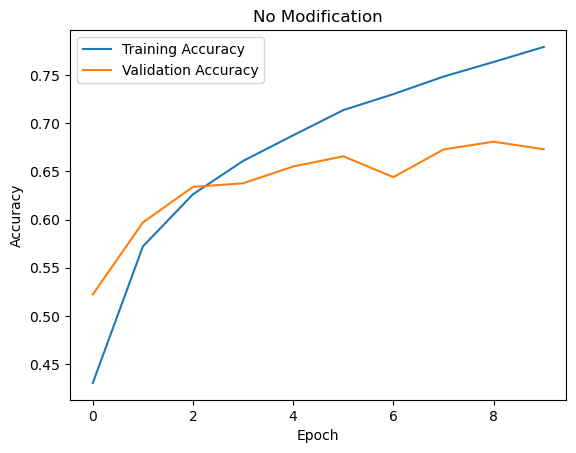

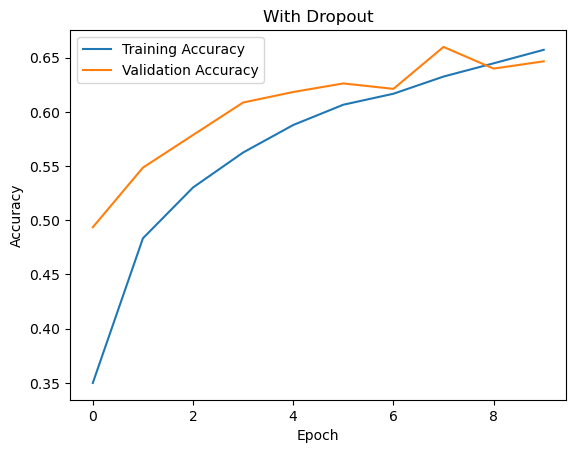

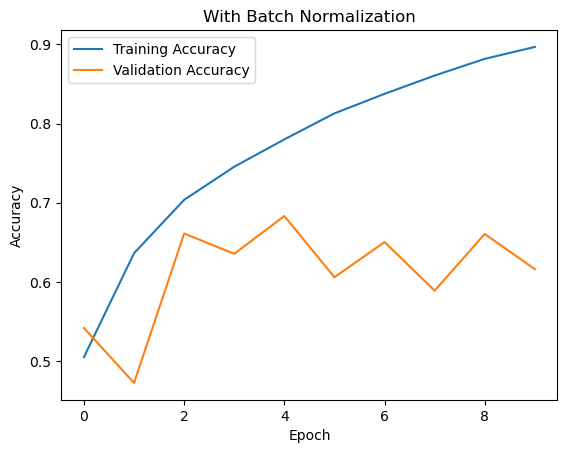

Training Time (No Modification): 467.80509328842163 seconds
Training Time (With Dropout): 516.574385881424 seconds
Training Time (With Batch Normalization): 714.0553939342499 seconds


In [10]:
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot accuracy for each model
plot_accuracy(history_no_mod, 'No Modification')
plot_accuracy(history_dropout, 'With Dropout')
plot_accuracy(history_batch_norm, 'With Batch Normalization')

# Print training time for each model
print(f"Training Time (No Modification): {time_no_mod} seconds")
print(f"Training Time (With Dropout): {time_dropout} seconds")
print(f"Training Time (With Batch Normalization): {time_batch_norm} seconds")